Linear regression assumes that the input variables have a Gaussian distribution. It is also
assumed that input variables are relevant to the output variable and that they are not highly
correlated with each other (a problem called collinearity).

3 of the most common metrics for evaluating predictions on regression
machine learning problems: <br/> <br/>
Mean Absolute Error <br/>
Mean Squared Error <br/>
$R^2$

#  Mean Absolute Error

The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions
and actual values. The measure gives an
idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

## Calculating mean absolute error on the Boston house price dataset

In [33]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values

In [34]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [37]:
dataframe.shape

(506, 14)

In [36]:
type(dataframe.values)

numpy.ndarray

In [8]:
X = array[:,0:13]
Y = array[:,13]

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html <br/>
https://scikit-learn.org/stable/modules/model_evaluation.html

In [38]:
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -4.005 (2.084)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


When summarizing performance measures, it is a good practice to summarize the
distribution of the measures, in this case assuming a Gaussian distribution of performance (a
very reasonable assumption) and recording the mean and standard deviation.

In [10]:
results

array([-2.20686845, -2.89680909, -2.78673044, -4.59847835, -4.10986504,
       -3.56469238, -2.66966723, -9.65637767, -5.02272517, -2.53725254])

# Mean Squared Error

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a
gross idea of the magnitude of error. Taking the square root of the mean squared error converts
the units back to the original units of the output variable and can be meaningful for description
and presentation. This is called the Root Mean Squared Error (or RMSE). 

In [12]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -34.705 (45.574)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# $R^2$ Metric

The $R^2$
(or R Squared) metric provides an indication of the goodness of fit of a set of predictions
to the actual values. In statistical literature this measure is called the coefficient of determination.
This is a value between 0 and 1 for no-fit and perfect fit respectively. <br/>
__R-Squared = Explained variance of the model / Total variance of the target variable__

In [13]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.203 (0.595)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


You can see the predictions have a poor fit to the actual values with a value closer to zero
and less than 0.5.

R-squared or R2 explains the degree to which your input variables explain the variation of your output / predicted variable. So, __if R-square is 0.8, it means 80% of the variation in the output variable is explained by the input variables__. So, in simple terms, higher the R squared, the more variation is explained by your input variables and hence better is your model. <br/>

However, the problem with R-squared is that it will either stay the same or increase with addition of more variables, even if they do not have any relationship with the output variables. This is where “Adjusted R square” comes to help. __Adjusted R-square penalizes you for adding variables which do not improve your existing model.__ <br/>

Hence, if you are building Linear regression on multiple variable, it is always suggested that you use Adjusted R-squared to judge goodness of model. In case you only have one input variable, R-square and Adjusted R squared would be exactly same. <br/>

Typically, the more non-significant variables you add into the model, the gap in R-squared and Adjusted R-squared increases.

# $R^2$ advanced

## Have a data set and form a linear regression

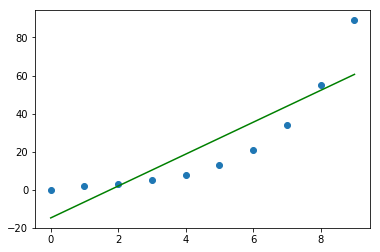

In [31]:
#importing
%matplotlib inline
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats
import math

#creating data
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([0,2,3,5,8,13,21,34,55,89])

#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(x)

#plot line
plt.scatter(x,y)
plt.plot(x,line1, c = 'g')
plt.show()

This line looks to be fit relatively well. The blue dots aren’t too far away from the regression line. The closer the dots are to the line, the lower our variance is. The lower the variance, the better our model is!

## Horizontal Y.mean() Line

We will place another line on our data. If we theoretically only had Y data (and no X), the best predictive model we would be able to make would be to guess the average of Y every time.

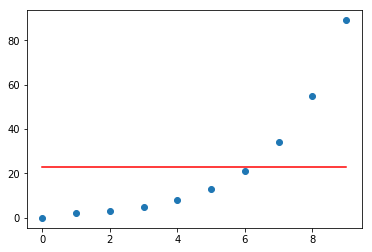

In [16]:
line2 = np.full(10,[y.mean()])
plt.scatter(x,y)
plt.plot(x,line2, c = 'r')
plt.show()

## Squared differences between the actual data points and linear model

If we measure the difference between each point of data and the linear regression line, square each difference and total them, we will get the variance that exists within the regression model.

In [17]:
differences_line1 = linefitline(x)-y
line1sum = 0
for i in differences_line1:
    line1sum = line1sum + (i*i)
line1sum

1753.0909090909095

## Squared differences between the actual data points and Y.mean() line

If we measure the difference between each point of data and the horizontal line, square each difference and total them, we will get the total variance that exists solely in the Y data set

In [18]:
differences_line2 = line2 - y
line2sum = 0
for i in differences_line2:
    line2sum = line2sum + (i*i)
line2sum

7524.0

## Final step and checking work

In [19]:
print("Variance of our linear model: ", line1sum)
print("Total variance of the target variable: ", line2sum)

Variance of our linear model:  1753.0909090909095
Total variance of the target variable:  7524.0


The variance is much smaller in our regression model. This is because we took into account the information gained analyzing our X data’s relationship with our Y data. The total variance, on the other hand, had less information to begin with, thus it has a higher variance. If we want to quantify how much variance was reduced by our using our linear regression, we would take the difference between total variance and the variance of our regression line.

In [20]:
print("Variance explained by our linear model: ", line2sum - line1sum)

Variance explained by our linear model:  5770.90909090909


In [21]:
print("R squared value of our linear model: ", (line2sum - line1sum)/line2sum)

R squared value of our linear model:  0.7670001449905754


In [29]:
print("This number can be interpreted as: {}% of the change in Y can be explained by the change in X.".format(round(((line2sum - line1sum)/line2sum)*100,2)))

This number can be interpreted as: 76.7% of the change in Y can be explained by the change in X.


In [30]:
r2 = r2_score(y, linefitline(x))
print('The rsquared value is: ' + str(r2))

The rsquared value is: 0.7670001449905756
